# Projet Théorie des langages

## Introduction
Le projet a lieu dans le cadre du cours de théories des langages réalisé au Semestre 2 de la deuixème année de Licence Sciences du Numérique. 
Il a été réalisé par Candice Giami et Clément Szewczyk. 

L'objectif du projet est d'implémenter une bibliotèque de fonction sur les automates en **python**. 

Les étapes du projet : 
- modélisation d’un automate.
- de charger la description d’un automate sous forme d’un fichier texte (texte brut, json, xml…) dont vous définirez
le format
- de sauvegarder la description d’un automate sous forme d’un fichier texte dont le format respecte celui en lecture
- d’afficher l’automate à l’écran ou de générer un fichier image.
- Réaliser des opérations élémentaires sur les automates (union, concaténation et répétition)
- Synchroniser un automate (suppression des 𝜖-transitions) **(BONUS)**
- Construire un automate à partir d’une expression régulière **(BONUS)**
- Compléter/Déterminiser/Minimiser un automate
- Reconnaitre une adresse mail à l’aide d’un automate

Les étapes sont découpé en 4 parties :
1. Modélisation d'un automate
2. Opérations sur les automates
3. Expressions régulières verd Automates (Bonus)
4. Finalisation

## Rapport du projet

Le rapport est réalisé avec Jupiter Notebook. Il est disponible dans le dossier `rapport`.
Pour avoir l'affichage des automates au sein du rapport, nous avons utilisé la bibliothèque `IPython` en particulier la fonction `display` et la fonction `Image`. 

```python

from IPython.display import display, Image

# Pour afficher un automate (exemple)
display(Image(filename='automate.png'))

```

Si nous éxécutons le code ci-dessus dans un notebook, nous aurons l'affichage de l'automate. Par contre, si nous exécutons le code dans un fichier python, nous n'aurons pas l'affichage de l'automate mais la ligne suivante dans la console : 

```bash
<IPython.core.display.Image object>
```

## Les différents fichiers/dossiers

- `automate.py` : contient la classe `Automate` qui permet de modéliser un automate. Cette contient les méthode permettant de travailler sur un automate. 
- `etat.py` : contient la classe `Etat` qui permet de modéliser un état.
- `transition.py` : contient la classe `Transition` qui permet de modéliser une transition.
- Le dossier `partie1` contient les fichiers suivants :
    - `modelisation.py` : contient les pour la modélisation d'un automate. Mais aussi l'importation et l'exportation d'un automate.
- Le dossier `partie2` contient les fichiers suivants :
    - Dossier `Union` : contient les fichiers de test pour l'union de deux automates.
    - Dossier `Concatenation` : contient les fichiers de test pour la concaténation de deux automates.
    - Dossier `Repetition` : contient les fichiers de test pour la répétition d'un automate.
## Les différentes classes

### Classe `Etat`

La classe `Etat` permet de modéliser un état. Elle a les attributs suivants :
- `nom` : un nom d'état
- `initial` : un booléen indiquant si l'état est initial
- `terminal` : un booléen indiquant si l'état est terminal

### Classe `Transition`

La classe `Transition` permet de modéliser une transition. Elle a les attributs suivants :
- `depart` : l'état de départ de la transition
- `symbole` : le ou les symbole(s) de la transition
- `arrivee` : l'état d'arrivée de la transition

### Classe `Automate`

La classe `Automate` permet de modéliser un automate. Elle a les attributs suivants :
-  `etats` : une liste d'états (instances de la classe `Etat`)
- `alphabet` : un ensemble de symboles
- `transitions` : une liste de transitions (instances de la classe `Transition`)

## Partie 1 : Modélisation d'un automate

### 1.1. Modélisation d'un automate

Pour modéliser un automate, nous utilisons la classe `Automate`, la classe `Etat` et la classe `Transition` (déjà présenté ci-dessus).

1. Initialisation de l'automate : on crée une instance de la classe `Automate` et on y ajoute l'alphabet de l'automate lors de l'initialisation. 
```python
alphabet={'a', 'b', 'c'}	
automate = Automate(alphabet)
```
2. Ajout d'états : on crée des instances de la classe `Etat` et on les ajoute à l'automate. Les paramètres de la classe `Etat` sont le nom de l'état, un booléen indiquant si l'état est terminal et un booléen indiquant si l'état est initial. 
```python
automate.ajouter_etat(Etat('q0', True, False))
```	
3. Ajout de transitions : on crée des instances de la classe `Transition` et on les ajoute à l'automate. Les paramètres de la classe `Transition` sont l'état de départ, le ou les symbole(s) de la transition et l'état d'arrivée. 
```python
automate.ajouter_transition(Transition('q0', 'a', 'q1'))
```

Notre automate est maintenant créé. Mais nous ne pouvons pas encore l'afficher. 

### 1.2. Affichage de l'automate

Pour obtenir une image, nous allons convertir notre automate en dot et ensuite en png. Nous utilisons la bibliothèque `graphviz`. 

```python
# Convertir l'automate en dot
automate.to_dot()

# Convertir le fichier dot en png
automate.to_png("automate")
```
La méthode `to_dot` retourne une chaîne de caractères représentant l'automate au format dot. La méthode `to_png` crée un fichier png représentant l'automate.

On n'est pas obligé de passer par la méthode `to_dot` pour afficher l'automate. On peut directement passer par la méthode `to_png` qui va appeler la méthode `to_dot` pour nous. 

Pour afficher l'automate, nous utilisons la fonction `display` de la bibliothèque `IPython`. 

Pour voir le résultat, il suffit d'ouvir le fichier `automate.png` qui a été créé.


### 1.3 Importation / Export d'un automate

- `export` : est une fonction qui permet d'exporter un Automate et prend en paramètre l'automate à exporter (self) et le nom du fichier. 
La fonction crée un fichier avec le nom donné si celui n'existe pas. Sinon elle modifie le fichier. 
La structure du fichier d'exportation est la suivante : 
    - Ligne 1 : Alphabet de l'automate
    - Ligne 2 : États de l'automate
    - Ligne 3 : États initiaux 
    - Ligne 4 : États terminaux
    - A partir de la ligne 5, nous retrouvons les transition avec la structure suivante : `état départ` `symbols` `état fin`

- `importation` : est une fonction qui permet d'importer un automate depuis un fichier texte et prend en paramètre le nom du fichier texte. 
La fonction rempli d'abord les variables qui vont nous permettre de créer l'automate. Pour cela elle suit la logique expliqué précédement. 
Une fois cela effectué, elle crée un nouvel automate qu'elle retourne. 

La paricularité de la fonction 'importation' est qu'elle est défini en dehors de la classe `Automate`. 

**Exemple d'utilisation**

```python
# Exporter un automate
automate.export("automate.txt")

# Importer un automate
automate = importation("automate.txt")
```


### 1.4 Exemple d'automate

Voici un exemple de modélisation d'un automate. Le code de cette exemple est disponible dans le fichier `partie1/modelisation.py`. 


Automate 1

Alphabet: ['a', 'b', 'c', 'd']
Etats: 1, 2, 3, 4
Etats terminaux: 3
Etat initial: 1
Transitions: 
1 --['a', 'b']--> 2
2 --b--> 3
3 --c--> 4
4 --d--> 1

Automate 1 au format dot

digraph {
	rankdir=LR
	init [shape=point]
	init -> 1
	1
	2
	3 [shape=doublecircle]
	3
	4
	1 -> 2 [label="a,b"]
	2 -> 3 [label=b]
	3 -> 4 [label=c]
	4 -> 1 [label=d]
}

Automate 1 au format png



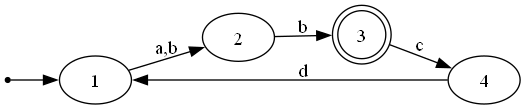

Automate 1 exporté dans modelisation1.txt

 


Automate 2 importé depuis modelisation1.txt

initiaux {'1'}
terminaux {'3'}
Automate 2

Alphabet: {'a', 'b', 'c', 'd'}
Etats: 4, 1, 3, 2
Etats terminaux: 3
Etat initial: 1
Transitions: 
1 --['a', 'b']--> 2
2 --['b']--> 3
3 --['c']--> 4
4 --['d']--> 1

Automate 2 au format png



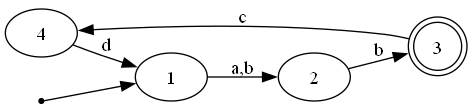

In [5]:
%run ../partie1/modelisation.py

## Partie 2 : Opérations sur les automates

### 2.1. Union de deux automates

#### 2.1.1 Méthode 'union'
La méthode `union` du fichier `automate.py` permet de réaliser l'union de deux automates.

**Alphabet** : L'alphabet de l'automate résultant est l'union des alphabets des deux automates plus un symbole supplémentaire, `une chaine vide`. Celui-ci permettra de réaliser des transitions vide.

**États** : 
- Dans un premier temps, nous procédons à un renommage des états des deux automates pour éviter les conflits.
- Ensuite, nous ajoutons un nouvel état initial et un état pour distribuer l'état initial aux anciens états initiaux des deux automates.

**Transitions et Etat Terminaux** :
- Nous ajoutons les transitions et les états terminaux des deux automates à l'automate résultant.
- Ajout de la transition vide entre le nouvel état initial et le nouvel état de distribution de l'état initial.
- Ajout de la transition vide entre les anciens état initiaux des deux automates et l'état temporaire

**Problème** : Nous avons un problème sur le fait que l'on pouvait ajouter une seul destination via notre méthode `ajouter_transition`. Or avec notre méthode `union` nous avons besoin de pouvoir ajouter plusieurs destinations. Lors de l'éxécution de la méthode `union` l'ajout se réalise correctement mais en écrasant l'ancien ajout. 

Pour cela, nous avons modifié la méthode `ajouter_transition` pour qu'elle puisse ajouter plusieurs destinations. 
Maintenant, nous avons le résultat attendu.
#### 2.1.2 Exemple d'utilisation

### 2.2 Concaténation de deux automates. 

#### 2.2.1

La méthode `concatenation` du fichier `automate.py` permet de réaliser la concaténation de deux automates. 

**Alphabet** : L'alphabet de l'automate résultant est l'union des alphabets des deux automates plus un symbole supplémentaire, `une chaine vide`. Celui-ci permettra de réaliser des transitions vide.

**Etats** :
- Dans un premier temps, nous procédons à un renommage des états des deux automates pour éviter les conflits.
- Ensuite, nous ajoutons un nouvel état initial et un état pour distribuer l'état initial aux anciens états initiaux des deux automates.

**Transitions et Etat Terminaux** :
- Nous ajoutons les transitions et les états terminaux des deux automates à l'automate de la concaténation.
- Ajout de la transition vide entre les anciens état terminaux de l'automate 1 et l'état temporaire. 
- Ajout de la transition vide entre l'état temporaire et les anciens états initiaux de l'automate 2.

#### 2.2.2 Exemple d'utilisation

### 2.3 Répétion d'un automate 

#### 2.3.1 Méthode `repetition`

#### 2.3.2 Exemple d'utilisation

## Partie 4 : Finalisation

### 4.1 Compléter un automate

### 4.2 Déterminisation d'un automate

#### 4.2.1 Méthode `est_déterministe`

Cette méthode permet de savoir si un automate est déterministe. Si oui, elle retourne `True`, sinon, elle retourne `False`

**Exemple d'utilisation**

Prenons l'exemple de l'automate suivant : 


Nous pouvons voir que l'automate 1 n'est pas déterministe car l'état 0 peut aller vers l'état 1 ou lui même avec le symbole `b`.

Contrairement à l'automate 2 qui est déterministe. 

#### 4.2.2 Méthode `determinisation`

**Algorithme de déterminisation** :
1. Création d'un automate vide
2. Création de l'état initial de l'automate déterministe
    - L'état initial de l'automate déterministe est l'ensemble des états atteignables à partir de l'état initial de l'automate non déterministe
3. Création de la table de transition

    - structure de la table de transition : 
        - clé : état de l'automate non déterministe
        - n colonnes : symboles de l'alphabet
    - 1ère ligne : état initial de l'automate non déterministe
    - 2eme et n lignes : états de l'automate non déterministe provenant de la table de transition

4. Interprétation de la table de transition

    - Pour chaque état de la table de transition, on crée un état dans l'automate déterministe

5. Création des états terminaux de l'automate déterministe

    - Un état de l'automate déterministe est terminal si au moins un des états de l'automate non déterministe qu'il représente est terminal